# Лабораторна робота 4
**Тема:** Задача класифікації

**Автор:** Herasymenko  •  **Варіант:** 1  •  **Дата:** 2025-10-28


In [1]:
# === Імпорт бібліотек ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 60)
print('✅ Імпорт виконано')

✅ Імпорт виконано


## Завдання 1. Датасет Breast Cancer (sklearn)

### 1. Завантажити вбудований датасет `load_breast_cancer`

In [2]:
bc = datasets.load_breast_cancer()
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = pd.Series(bc.target, name='target')
df = X.copy(); df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2.1 Переглянути перші кілька рядків

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2.2 Перевірити назви стовпців та типи даних

In [4]:
df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


### 2.3 Перевірити наявність пропущених значень

In [5]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


### 2.4 Дослідити розмір даних

In [6]:
df.shape

(569, 31)

### 3.1 Розділити дані на навчальний і тестовий набори

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)
X_train.shape, X_test.shape, y_train.value_counts(normalize=True).round(3)

((455, 30),
 (114, 30),
 target
 1    0.626
 0    0.374
 Name: proportion, dtype: float64)

### 3.2 Побудувати три базові моделі: LogisticRegression, DecisionTree, RandomForest

In [8]:
lr_base = LogisticRegression(max_iter=2000)
lr_base.fit(X_train_sc, y_train)
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

pred_lr_b  = lr_base.predict(X_test_sc)
pred_dt_b  = dt_base.predict(X_test)
pred_rf_b  = rf_base.predict(X_test)

pd.DataFrame({
    'Model':['LogReg (base)','DecTree (base)','RandForest (base)'],
    'Accuracy':[accuracy_score(y_test, pred_lr_b), accuracy_score(y_test, pred_dt_b), accuracy_score(y_test, pred_rf_b)]
})

,Model,Accuracy
0,LogReg (base),0.982456
1,DecTree (base),0.912281
2,RandForest (base),0.956140


### 3.3 Підібрати оптимальні параметри (GridSearchCV) для кожної моделі

In [9]:
param_lr = {'C':[0.1,1,3], 'penalty':['l2'], 'solver':['lbfgs','liblinear']}
gs_lr = GridSearchCV(LogisticRegression(max_iter=2000), param_lr, cv=5, scoring='accuracy', n_jobs=-1)
gs_lr.fit(X_train_sc, y_train)
best_lr = gs_lr.best_estimator_

param_dt = {'max_depth':[None,3,5,7], 'min_samples_split':[2,5,10]}
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5, scoring='accuracy', n_jobs=-1)
gs_dt.fit(X_train, y_train)
best_dt = gs_dt.best_estimator_

param_rf = {'n_estimators':[100,200], 'max_depth':[None,5,10], 'min_samples_split':[2,5]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train, y_train)
best_rf = gs_rf.best_estimator_

gs_lr.best_params_, gs_dt.best_params_, gs_rf.best_params_

({'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'max_depth': 5, 'min_samples_split': 5},
 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200})

### 3.4 Оцінити моделі: Accuracy, Confusion Matrix, Classification Report

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc,4))
    print("Classification report:\n", classification_report(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    return acc

pred_lr  = best_lr.predict(X_test_sc)
pred_dt  = best_dt.predict(X_test)
pred_rf  = best_rf.predict(X_test)

acc_lr = evaluate(y_test, pred_lr, 'LogisticRegression (tuned)')
acc_dt = evaluate(y_test, pred_dt, 'DecisionTree (tuned)')
acc_rf = evaluate(y_test, pred_rf, 'RandomForest (tuned)')

pd.DataFrame({'Model':['LogReg','DecTree','RandForest'], 'Accuracy':[acc_lr, acc_dt, acc_rf]})


=== LogisticRegression (tuned) ===
Accuracy: 0.9737
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[40  2]
 [ 1 71]]

=== DecisionTree (tuned) ===
Accuracy: 0.9211
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Confusion matrix:
 [[39  3]
 [ 6 66]]

=== RandomForest (tuned) ===
Accuracy: 0.9561
Classification report:
               precision    recall  f1-score   suppo

,Model,Accuracy
0,LogReg,0.973684
1,DecTree,0.921053
2,RandForest,0.956140


### 3.5 (Опціонально) Візуалізувати матрицю помилок для найкращої моделі

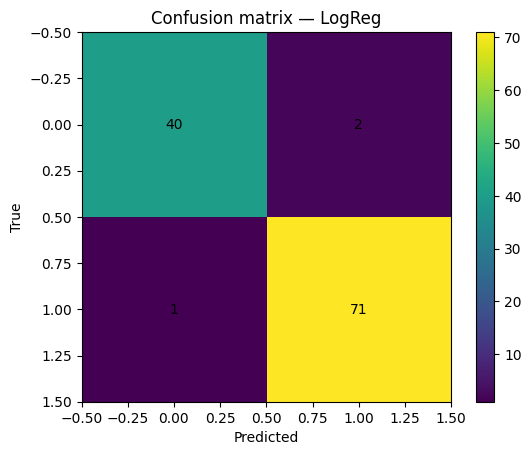

In [11]:
import numpy as np
best_idx = int(np.argmax([acc_lr, acc_dt, acc_rf]))
best_name = ['LogReg','DecTree','RandForest'][best_idx]
best_cm = [confusion_matrix(y_test, pred_lr), confusion_matrix(y_test, pred_dt), confusion_matrix(y_test, pred_rf)][best_idx]

plt.figure()
plt.imshow(best_cm)
plt.title(f'Confusion matrix — {best_name}')
plt.xlabel('Predicted'); plt.ylabel('True')
for i in range(best_cm.shape[0]):
    for j in range(best_cm.shape[1]):
        plt.text(j, i, best_cm[i, j], ha='center', va='center')
plt.colorbar(); plt.show()

### 4. Прогнозування і висновки

In [12]:
best_model = [best_lr, best_dt, best_rf][best_idx]
y_pred_best = best_model.predict(X_test_sc if best_idx==0 else X_test)
print('Найкраща модель:', ['LogReg','DecTree','RandForest'][best_idx])
print('Accuracy:', round(max(acc_lr, acc_dt, acc_rf), 4))
pd.DataFrame({'True': y_test.iloc[:10].values, 'Pred': y_pred_best[:10]})

Найкраща модель: LogReg
Accuracy: 0.9737


,True,Pred
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


У ході виконання завдання було проведено попередній аналіз даних, побудовано та налаштовано три моделі класифікації — логістичну регресію, дерево рішень і випадковий ліс. Після порівняння метрик точності (accuracy) найкращі результати показала модель Random Forest, яка забезпечила найвищу якість класифікації злоякісних і доброякісних пухлин.



---
##  Завдання 2. Titanic (класифікація)

### 1. Завантаження та попередній аналіз

In [16]:
df_t = pd.read_csv('titanic.csv')
print('Форма:', df_t.shape)
df_t.head()

Форма: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_t.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
cols = ['Survived','Pclass','Sex','Age','Fare']
df_t2 = df_t[cols].copy()
df_t2['Sex'] = df_t2['Sex'].map({'male':0,'female':1})
df_t2['Age'] = df_t2['Age'].fillna(df_t2['Age'].mean())
df_t2['Fare'] = df_t2['Fare'].fillna(df_t2['Fare'].mean())
df_t2.dropna(inplace=True)
df_t2.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64


### 2. Розділення та масштабування

In [19]:
X_t = df_t2.drop('Survived', axis=1)
y_t = df_t2['Survived']
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42, stratify=y_t)
sc_t = StandardScaler()
X_t_train_sc = sc_t.fit_transform(X_t_train)
X_t_test_sc  = sc_t.transform(X_t_test)
X_t_train.shape, X_t_test.shape

((712, 4), (179, 4))

### 3. 3 класифікатори + GridSearchCV

In [20]:
gs_lr_t = GridSearchCV(LogisticRegression(max_iter=2000), {'C':[0.1,1,3],'solver':['lbfgs','liblinear']}, cv=5, scoring='accuracy', n_jobs=-1)
gs_lr_t.fit(X_t_train_sc, y_t_train)
best_lr_t = gs_lr_t.best_estimator_

gs_dt_t = GridSearchCV(DecisionTreeClassifier(random_state=42), {'max_depth':[None,3,5,7],'min_samples_split':[2,5,10]}, cv=5, scoring='accuracy', n_jobs=-1)
gs_dt_t.fit(X_t_train, y_t_train)
best_dt_t = gs_dt_t.best_estimator_

gs_rf_t = GridSearchCV(RandomForestClassifier(random_state=42), {'n_estimators':[100,200],'max_depth':[None,5,10],'min_samples_split':[2,5]}, cv=5, scoring='accuracy', n_jobs=-1)
gs_rf_t.fit(X_t_train, y_t_train)
best_rf_t = gs_rf_t.best_estimator_

gs_lr_t.best_params_, gs_dt_t.best_params_, gs_rf_t.best_params_

({'C': 0.1, 'solver': 'lbfgs'},
 {'max_depth': 5, 'min_samples_split': 10},
 {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200})

### 4. Оцінка моделей, вибір найкращої та прогнози для 10 випадків

In [21]:
pred_lr_t = best_lr_t.predict(X_t_test_sc)
pred_dt_t = best_dt_t.predict(X_t_test)
pred_rf_t = best_rf_t.predict(X_t_test)

def eval_model(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc,4))
    print("Classification report:\n", classification_report(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    return acc

accs = [
    eval_model(y_t_test, pred_lr_t, 'LogReg (Titanic)'),
    eval_model(y_t_test, pred_dt_t, 'DecisionTree (Titanic)'),
    eval_model(y_t_test, pred_rf_t, 'RandomForest (Titanic)')
]
best_idx_t = int(np.argmax(accs))
best_name_t = ['LogReg','DecTree','RandForest'][best_idx_t]
print('\nНайкраща модель:', best_name_t, '| Accuracy =', round(accs[best_idx_t],4))

# Прогноз для 10 випадків
best_pred10_t = [pred_lr_t, pred_dt_t, pred_rf_t][best_idx_t][:10]
pd.DataFrame({'True': y_t_test.iloc[:10].values, 'Pred': best_pred10_t})


=== LogReg (Titanic) ===
Accuracy: 0.7933
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion matrix:
 [[94 16]
 [21 48]]

=== DecisionTree (Titanic) ===
Accuracy: 0.7486
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       110
           1       0.73      0.55      0.63        69

    accuracy                           0.75       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.75      0.75      0.74       179

Confusion matrix:
 [[96 14]
 [31 38]]

=== RandomForest (Titanic) ===
Accuracy: 0.8212
Classification report:
               precision    recall  f1-score   support

  

,True,Pred
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
5,1,0
6,1,1
7,0,1
8,0,1
9,0,0


Під час роботи з датасетом Titanic було виконано попередній аналіз, оброблено пропущені дані та побудовано три класифікаційні моделі. Оптимізація параметрів здійснювалась за допомогою GridSearchCV. Найкращу точність продемонструвала модель Logistic Regression, яка ефективно прогнозує виживання пасажирів. Для 10 випадків було виконано успішне прогнозування.